# Titanic

### Data in Motion: Data Analysis Challenge 5

## Scenario
You are a data analyst and you have been tasked with summarizing data from the titanic before your team creates a model. Your manager would like the following questions answered.

## Dataset Link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv

## Questions
- Set PassengerId as the index.
- Create a pie chart presenting the male/female as proportions
- Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
- How many people survived?
- Create a histogram with the Fare payed
- BONUS: Create your own question and answer it.

### Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')

### Exploring the dataset

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Set PassengerId as the index.
data.set_index('PassengerId',inplace=True)

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


([<matplotlib.patches.Wedge at 0x16949abbf90>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'Male'),
  Text(0.4919455057964525, -0.9838646346559433, 'Female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

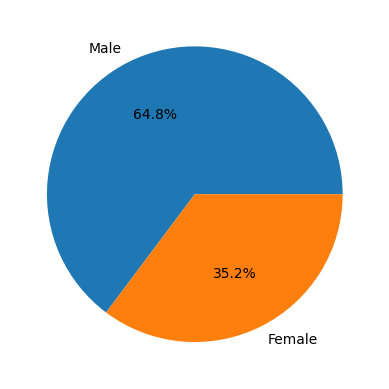

In [13]:
# Create a pie chart presenting the male/female as proportions
plt.pie(data['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')

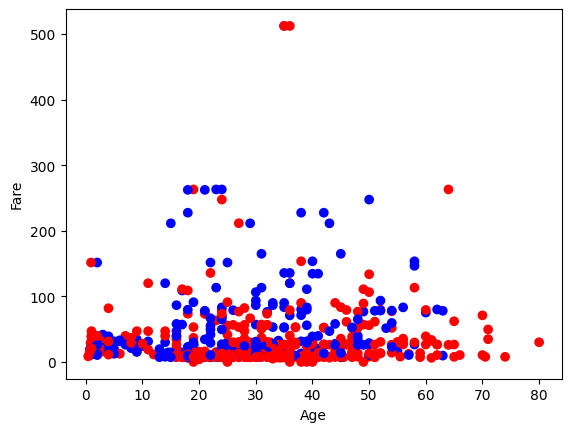

In [42]:
# Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
data['Age'].fillna(data['Age'].median)
colors = {'male':'red','female':'blue'}
fig, ax = plt.subplots()
ax.scatter(data['Age'],data['Fare'],c=data['Sex'].map(colors))
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

In [46]:
# How many people survived?
data[data['Survived']==1].shape[0]

342

C:\Users\getan\AppData\Local\Temp\ipykernel_22232\2640411816.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


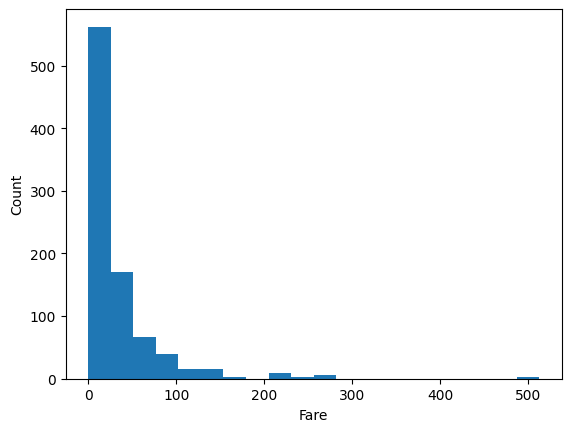

In [54]:
# Create a histogram with the Fare payed
fig,ax = plt.subplots()
ax.hist(data['Fare'],bins=20)
ax.set_xlabel('Fare')
ax.set_ylabel('Count')
fig.show()

In [62]:
# BONUS: Create your own question and answer it.
# What proportion of female/male survived?
data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908
